Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


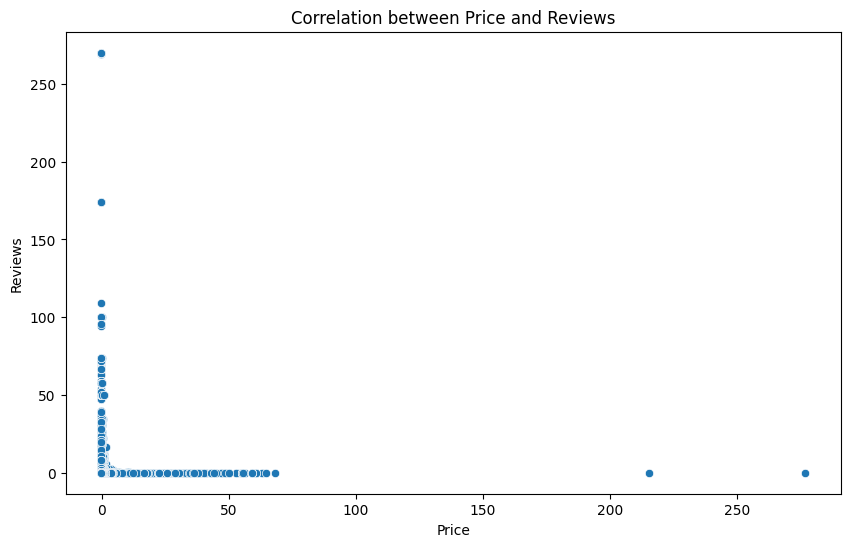

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


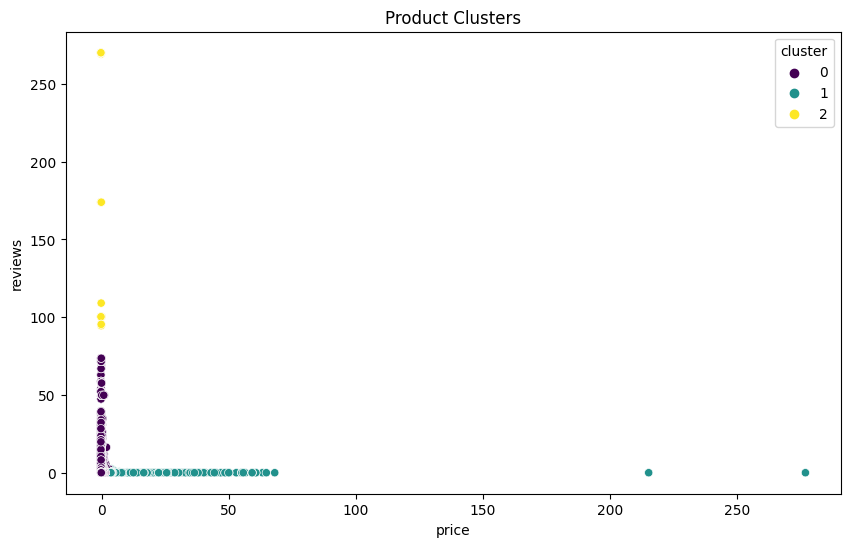

Mean Squared Error: 0.16911433156474295
R2 Score: 0.9645990298476858


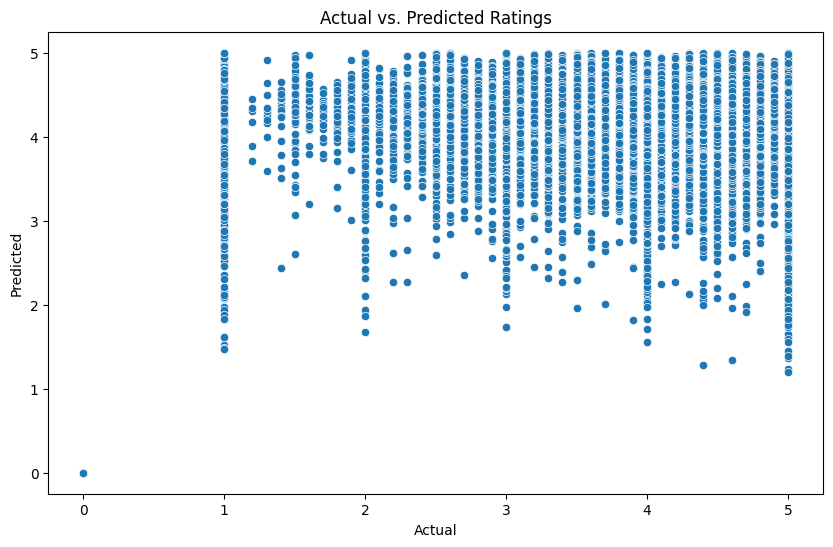

In [ ]:
# Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
import pickle

# Load the dataset from Google Drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/amz_uk_processed_data.csv')  # Adjust the path to your dataset

# Data Cleaning and Preprocessing
data.dropna(subset=['reviews'], inplace=True)
data['isBestSeller'] = data['isBestSeller'].astype(int)
data['boughtInLastMonth'] = data['boughtInLastMonth'].astype(int)
data = pd.get_dummies(data, columns=['categoryName'])
scaler = StandardScaler()
data[['price', 'reviews']] = scaler.fit_transform(data[['price', 'reviews']])

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True).set(title="Distribution of Price", xlabel="Price", ylabel="Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', data=data).set(title="Correlation between Price and Reviews", xlabel="Price", ylabel="Reviews")
plt.show()

# Unsupervised Learning: K-Means Clustering
X_cluster = data[['price', 'reviews']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='reviews', hue='cluster', data=data, palette='viridis').set(title="Product Clusters")
plt.show()

# Supervised Learning: Random Forest for Sales Prediction
X = data[['price', 'reviews', 'isBestSeller', 'boughtInLastMonth']]
y = data['stars']  # Adjust based on your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Model Evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred).set(title="Actual vs. Predicted Ratings", xlabel="Actual", ylabel="Predicted")
plt.show()

# Saving the Random Forest model to Google Drive
with open('/content/drive/MyDrive/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
